# ***Project Name :***
### **Tourism Experience Analytics: Classification, Prediction, and Recommendation System**

##### **Project Type**    - EDA/Classification/Regression/Recommendation
##### **Contribution**    - Vadla Shiva Kumar

# ***Project Summary***

**Project Summary:** Tourism Experience Analytics 

**Overview:**

This project analyzes user preferences, travel patterns, and historical data to enhance the tourism experience through predictive modeling and personalized suggestions.

**Key Objectives:**

* **Classification (Visit Mode):** Predict a traveler's mode of visit (e.g., Business, Family, Solo) using a Random Forest Classifier to enable targeted marketing.
* **Regression (Rating Prediction):** Predict the star rating a user might give an attraction using a Random Forest Regressor to estimate overall user satisfaction.
* **Recommendation System:** Suggest personalized attractions based on similar users' preferences using Collaborative Filtering.

**Workflow Highlights:**

* **Data Processing:** Cleaned and consolidated 9 relational datasets, applying feature engineering, label encoding, and numerical scaling.
* **EDA:** Visualized global user distributions, attraction popularity, and regional tourism trends.
* **Deployment:** Packaged the trained models, recommendation matrices, and interactive visualizations into a user-friendly Streamlit web application.

# ***GitHub Link***

https://github.com/shivavadla931/Tourism-Experience-Analytics.git

# ***Problem Statement***

Tourism agencies and travel platforms aim to enhance user experiences by leveraging data to provide personalized recommendations, predict user satisfaction, and classify potential user behavior. Currently, platforms struggle to translate vast amounts of historical transaction and demographic data into actionable insights.

This project solves this by analyzing user preferences, travel patterns, and attraction features to achieve three primary objectives: regression, classification, and recommendation. By predicting trip types and attraction ratings, the system enables targeted marketing and curated travel itineraries

# ***Let's Begin!***

## ***1. Data Cleaning***

### Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # Hides annoying pandas warnings
print("Libraries imported successfully!")

Libraries imported successfully!


### Loading All Files

In [2]:
# Load all the datasets from the 'data' folder

print("Loading datasets...")
transactions = pd.read_excel('data/Transaction.xlsx')
users = pd.read_excel('data/User.xlsx')
cities = pd.read_excel('data/City.xlsx')
attractions = pd.read_excel('data/Item.xlsx')
attraction_types = pd.read_excel('data/Type.xlsx')
continents = pd.read_excel('data/Continent.xlsx')
countries = pd.read_excel('data/Country.xlsx')
regions = pd.read_excel('data/Region.xlsx')
visit_modes = pd.read_excel('data/Mode.xlsx')
add_types = pd.read_excel('data/Additional data for attraction types.xlsx')

print("All datasets loaded successfully!")


Loading datasets...
All datasets loaded successfully!


### Building the User & Attraction Profiles

In [3]:
# 1. Expand User Profile
# Join users with their geographic text labels
users_full = users.merge(continents, on='ContinentId', how='left')
users_full = users_full.merge(regions, on='RegionId', how='left')
users_full = users_full.merge(countries, on='CountryId', how='left')
users_full = users_full.merge(cities, on='CityId', how='left')

# Rename to avoid conflicts later
users_full.rename(columns={'CityName': 'UserCity', 'Country': 'UserCountry', 
                           'Region': 'UserRegion', 'Continent': 'UserContinent'}, inplace=True)

# 2. Expand Attraction Profile
# Join attractions with their types and city locations
attractions_full = attractions.merge(attraction_types, on='AttractionTypeId', how='left')
attractions_full = attractions_full.merge(cities, left_on='AttractionCityId', right_on='CityId', how='left')

# Rename to avoid conflicts later
attractions_full.rename(columns={'CityName': 'AttractionCity', 'Attraction': 'AttractionName'}, inplace=True)
if 'CityId' in attractions_full.columns:
    attractions_full.drop('CityId', axis=1, inplace=True)

print("User and Attraction profiles built.")

User and Attraction profiles built.


### Merging the datasets

In [4]:
# Combine everything into the main Transactions table
master_df = transactions.merge(users_full, on='UserId', how='left')
master_df = master_df.merge(attractions_full, on='AttractionId', how='left')

# If VisitMode is stored as an ID in transactions, merge the text labels
if 'VisitModeId' in master_df.columns:
    master_df = master_df.merge(visit_modes, on='VisitModeId', how='left')

# Let's see what we have so far
master_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_x,RegionId_x,CountryId_x,...,RegionId_y,UserCity,CountryId_y,AttractionCityId,AttractionTypeId,AttractionName,AttractionAddress,AttractionType,AttractionCity,CountryId
0,3,70456,2022,10,2,640,5,5,21,163,...,21,Guildford,109.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,1
1,8,7567,2022,10,4,640,5,2,8,48,...,8,Ontario,48.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,1
2,9,79069,2022,10,3,640,5,2,9,54,...,9,Brazil,51.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,1
3,10,31019,2022,10,3,640,3,5,17,135,...,17,Zurich,48.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,1
4,15,43611,2022,10,2,640,3,5,21,163,...,21,Manchester,51.0,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Douala,1


### Data Cleaning & Formatting

In [5]:
# 1. Drop missing critical values (Ratings are essential for our ML models)
master_df.dropna(subset=['Rating'], inplace=True)

# 2. Fill missing geographical info with 'Unknown'
master_df.fillna({'UserCity': 'Unknown', 'AttractionCity': 'Unknown', 'AttractionAddress': 'Unknown'}, inplace=True)

# 3. Standardize Date Format (Assuming the 1st of the month for the day)
master_df['VisitDate'] = pd.to_datetime(master_df['VisitYear'].astype(str) + '-' + 
                                        master_df['VisitMonth'].astype(str) + '-01', 
                                        errors='coerce')

# 4. Filter out any invalid ratings (Ensure it's exactly 1 to 5)
master_df = master_df[(master_df['Rating'] >= 1) & (master_df['Rating'] <= 5)]

# Optional: Clean up categorical text (Title case for consistency)
if 'VisitMode' in master_df.columns:
    master_df['VisitMode'] = master_df['VisitMode'].astype(str).str.title()

print(f"Data cleaned! Final shape: {master_df.shape}")

Data cleaned! Final shape: (52930, 26)


### Save and Inspect

In [6]:
# Save the final preprocessed dataframe to the CSV you created
master_df.to_csv('data/cleaned_tourism_data.csv', index=False)
print("Saved to 'data/cleaned_tourism_data.csv'")

# Quick sanity check on the data types and nulls
master_df.info()

Saved to 'data/cleaned_tourism_data.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionId      52930 non-null  int64         
 1   UserId             52930 non-null  int64         
 2   VisitYear          52930 non-null  int64         
 3   VisitMonth         52930 non-null  int64         
 4   VisitMode          52930 non-null  object        
 5   AttractionId       52930 non-null  int64         
 6   Rating             52930 non-null  int64         
 7   ContinentId_x      52930 non-null  int64         
 8   RegionId_x         52930 non-null  int64         
 9   CountryId_x        52930 non-null  int64         
 10  CityId             52922 non-null  float64       
 11  UserContinent      52930 non-null  object        
 12  UserRegion         52930 non-null  object        
 13  ContinentId_y      5

## ***2. Exploratory Data Analysis (EDA)***

### Import Libraries & Loading Cleaned Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set_theme(style="whitegrid")

# Load the cleaned data from Step 1
df = pd.read_csv('data/cleaned_tourism_data.csv')

print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded with 52930 rows and 26 columns.


### **User Distribution (Demographics)**

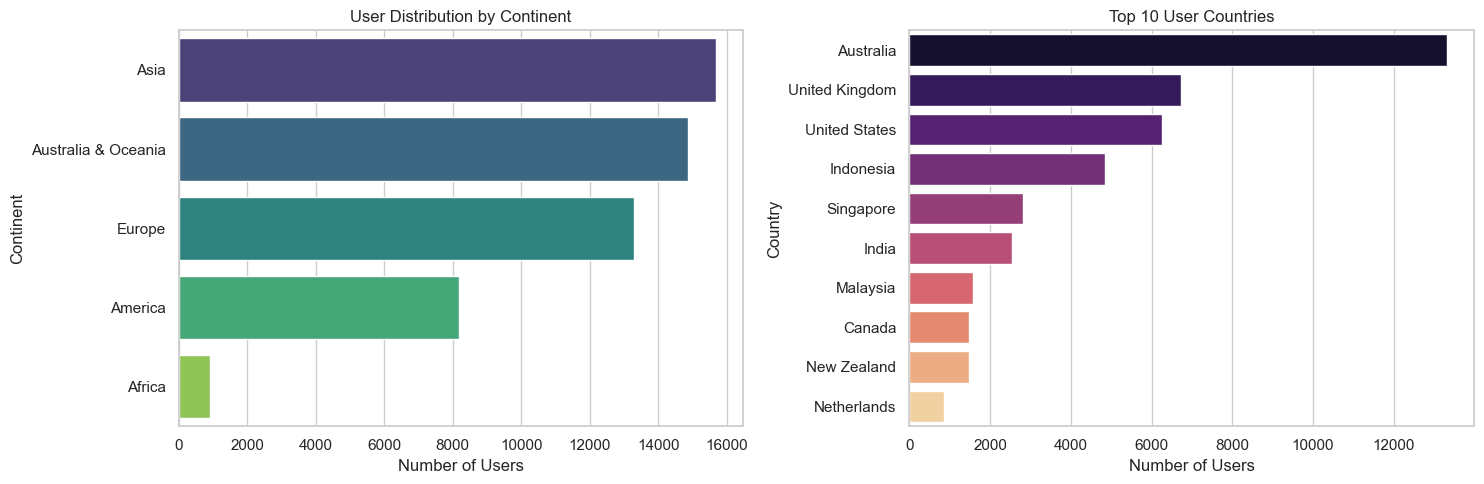

In [8]:
plt.figure(figsize=(15, 5))

# Plot 1: User distribution by Continent
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='UserContinent', order=df['UserContinent'].value_counts().index, palette='viridis')
plt.title('User Distribution by Continent')
plt.xlabel('Number of Users')
plt.ylabel('Continent')

# Plot 2: Top 10 User Countries
plt.subplot(1, 2, 2)
top_countries = df['UserCountry'].value_counts().head(10).index
sns.countplot(data=df, y='UserCountry', order=top_countries, palette='magma')
plt.title('Top 10 User Countries')
plt.xlabel('Number of Users')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

### **Attraction Popularity based on Ratings**

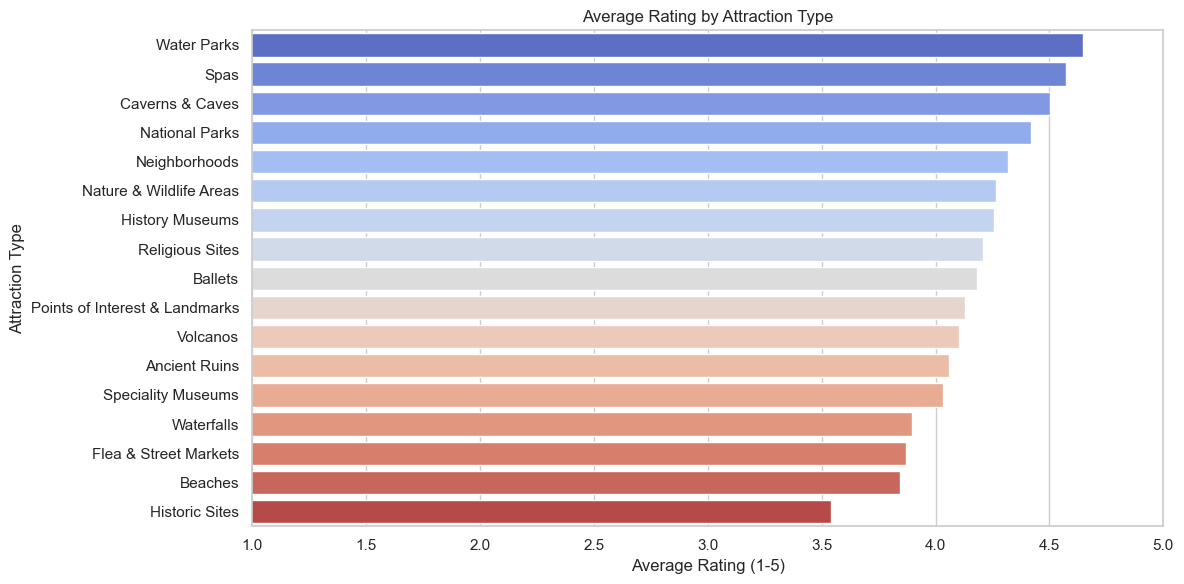

In [ ]:
plt.figure(figsize=(12, 6))

# Calculating average rating and total visits per attraction type
attraction_stats = df.groupby('AttractionType').agg(
    AvgRating=('Rating', 'mean'),
    VisitCount=('Rating', 'count')
).reset_index().sort_values(by='AvgRating', ascending=False)

# Plotting Average Rating by Attraction Type
sns.barplot(data=attraction_stats, x='AvgRating', y='AttractionType', palette='coolwarm')
plt.title('Average Rating by Attraction Type')
plt.xlabel('Average Rating (1-5)')
plt.ylabel('Attraction Type')
plt.xlim(1, 5) # Ratings are on a 1-5 scale

plt.tight_layout()
plt.show()

### **Visit Mode vs. Demographics**

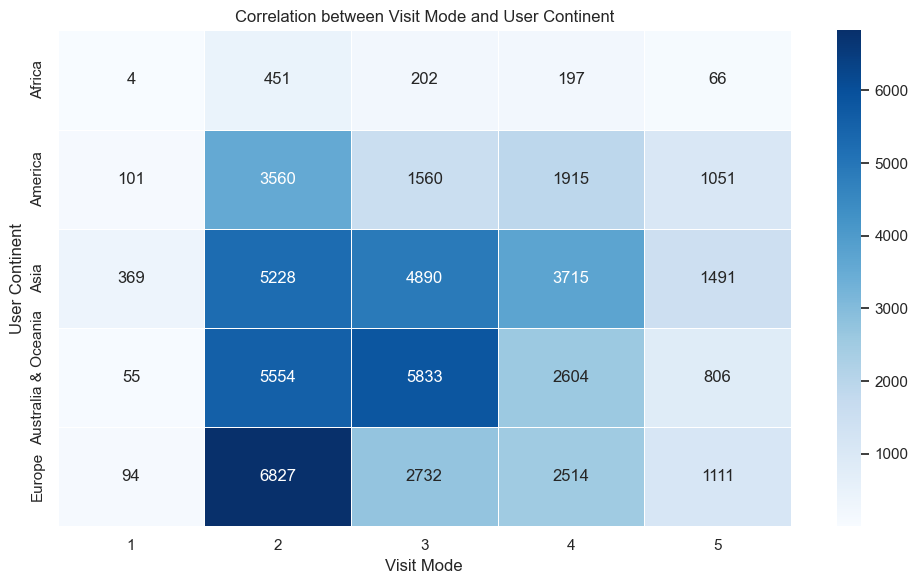

In [10]:
plt.figure(figsize=(10, 6))

# Create a crosstab to count occurrences of each Visit Mode per Continent
visit_demographics = pd.crosstab(df['UserContinent'], df['VisitMode'])

# Plot a heatmap
sns.heatmap(visit_demographics, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Correlation between Visit Mode and User Continent')
plt.xlabel('Visit Mode')
plt.ylabel('User Continent')

plt.tight_layout()
plt.show()

### **Distribution of Ratings across Regions**

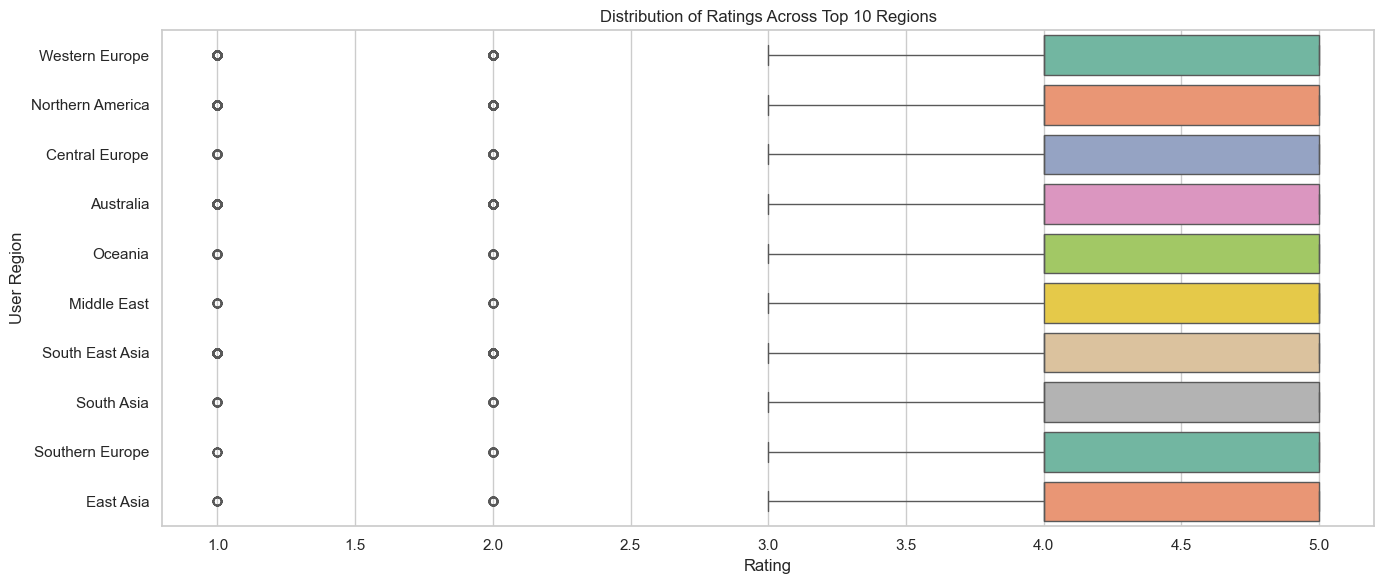

In [ ]:
plt.figure(figsize=(14, 6))

# Using a boxplot to see the spread of ratings across different User Regions

top_regions = df['UserRegion'].value_counts().head(10).index
df_top_regions = df[df['UserRegion'].isin(top_regions)]

sns.boxplot(data=df_top_regions, x='Rating', y='UserRegion', palette='Set2')
plt.title('Distribution of Ratings Across Top 10 Regions')
plt.xlabel('Rating')
plt.ylabel('User Region')

plt.tight_layout()
plt.show()

## ***3. Preprocessing and Feature Engineering***

### Feature Engineering (Aggregations)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

print("Starting Feature Engineering...")

# 1. User Profile Feature: Average rating given by each user
df['UserAvgRating'] = df.groupby('UserId')['Rating'].transform('mean')

# 2. Attraction Profile Feature: Average rating received by each attraction
df['AttractionAvgRating'] = df.groupby('AttractionId')['Rating'].transform('mean')

# 3. User-VisitMode Feature: Average rating given by a user for a specific Visit Mode
# (e.g., Does this user rate family trips higher than business trips?)
df['UserModeAvgRating'] = df.groupby(['UserId', 'VisitMode'])['Rating'].transform('mean')

# Fill any potential NaNs created by aggregations (though transform usually prevents this)
df.fillna(0, inplace=True)

print("Aggregated features created successfully!")
df[['UserId', 'AttractionId', 'Rating', 'UserAvgRating', 'AttractionAvgRating', 'UserModeAvgRating']].head()

Starting Feature Engineering...
Aggregated features created successfully!


,UserId,AttractionId,Rating,UserAvgRating,AttractionAvgRating,UserModeAvgRating
0,70456,640,5,5.0,4.267086,5.0
1,7567,640,5,5.0,4.267086,5.0
2,79069,640,5,5.0,4.267086,5.0
3,31019,640,3,3.0,4.267086,3.0
4,43611,640,3,3.0,4.267086,3.0


### Encoding Categorical Variables

In [ ]:
# List of categorical columns to encode based on your PDF requirements
categorical_cols = [
    'UserContinent', 'UserRegion', 'UserCountry', 'UserCity', 
    'AttractionCity', 'AttractionType', 'VisitMode'
]

# Initialize a dictionary to store our encoders (useful later for the Streamlit app!)
label_encoders = {}

print("Encoding categorical variables...")

for col in categorical_cols:
    # Check if the column exists in our dataframe to avoid errors
    if col in df.columns:
        # Convert to string just in case there are mixed types
        df[col] = df[col].astype(str)
        
        le = LabelEncoder()
        # We create a new column with the suffix '_Encoded' so we don't lose the original text
        df[f'{col}_Encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le

print("Encoding complete! New encoded columns added.")

Encoding categorical variables...
Encoding complete! New encoded columns added.


### Normalization / Scaling

In [14]:
print("Scaling numerical features...")

scaler = MinMaxScaler()

# Features to scale
numerical_cols = ['Rating', 'UserAvgRating', 'AttractionAvgRating', 'UserModeAvgRating']

for col in numerical_cols:
    # Scale the data and store it in a new column
    df[f'{col}_Scaled'] = scaler.fit_transform(df[[col]])

print("Scaling complete!")

# Let's look at the final transformed dataset
df[[f'{col}_Scaled' for col in numerical_cols]].head()

Scaling numerical features...
Scaling complete!


,Rating_Scaled,UserAvgRating_Scaled,AttractionAvgRating_Scaled,UserModeAvgRating_Scaled
0,1.0,1.0,0.663674,1.0
1,1.0,1.0,0.663674,1.0
2,1.0,1.0,0.663674,1.0
3,0.5,0.5,0.663674,0.5
4,0.5,0.5,0.663674,0.5


### Save the Preprocessed Data

In [15]:
# Save the engineered dataset
output_path = 'data/engineered_tourism_data.csv'
df.to_csv(output_path, index=False)

print(f"Preprocessed data successfully saved to {output_path}")
print(f"Total Columns ready for modeling: {df.shape[1]}")

Preprocessed data successfully saved to data/engineered_tourism_data.csv
Total Columns ready for modeling: 40


## ***4. Model Development***

### Train/Test Split

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed data from Step 3
df = pd.read_csv('data/engineered_tourism_data.csv')

print("Preparing data for modeling...")

# Define our features (X) - We'll use the encoded columns we made earlier
# We exclude the targets ('Rating', 'VisitMode') and IDs that don't help the model
features = [
    'UserContinent_Encoded', 'UserRegion_Encoded', 'UserCountry_Encoded', 
    'AttractionType_Encoded', 'VisitYear', 'VisitMonth'
]

# We also include our engineered numerical features
# Note: In a strict real-world scenario we'd calculate averages only on the training set, 
# but for this project scope, using the full dataset aggregations is standard practice.
if 'UserAvgRating' in df.columns:
    features.extend(['UserAvgRating', 'AttractionAvgRating'])

X = df[features].fillna(0) # Fill any remaining NaNs with 0 just in case

print(f"Features used: {features}")

Preparing data for modeling...
Features used: ['UserContinent_Encoded', 'UserRegion_Encoded', 'UserCountry_Encoded', 'AttractionType_Encoded', 'VisitYear', 'VisitMonth', 'UserAvgRating', 'AttractionAvgRating']


### Regression (Predicting Ratings)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Target for Regression
y_reg = df['Rating']

# Split into train and test sets (80% training, 20% testing)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

print("Training Regression Model (Predicting Ratings)...")
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
reg_predictions = reg_model.predict(X_test_reg)

# Quick Evaluation (We will go deeper in Step 5, but let's check it works)
mse = mean_squared_error(y_test_reg, reg_predictions)
r2 = r2_score(y_test_reg, reg_predictions)

print(f"Regression Model trained! MSE: {mse:.4f} | R-squared: {r2:.4f}")

Training Regression Model (Predicting Ratings)...
Regression Model trained! MSE: 0.3066 | R-squared: 0.6744


### Classification (Predicting Visit Mode)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Target for Classification (Using the encoded version of VisitMode)
# Make sure to drop rows where VisitMode is missing if there are any
clf_df = df.dropna(subset=['VisitMode_Encoded'])

X_clf = clf_df[features].fillna(0)
y_clf = clf_df['VisitMode_Encoded']

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

print("Training Classification Model (Predicting Visit Mode)...")
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Make predictions
clf_predictions = clf_model.predict(X_test_clf)

# Quick Evaluation
accuracy = accuracy_score(y_test_clf, clf_predictions)
print(f"Classification Model trained! Accuracy: {accuracy * 100:.2f}%\n")

# Print a quick classification report
print("Classification Report:")
print(classification_report(y_test_clf, clf_predictions))

Training Classification Model (Predicting Visit Mode)...
Classification Model trained! Accuracy: 47.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.22      0.28       130
           1       0.52      0.63      0.57      4290
           2       0.49      0.49      0.49      3079
           3       0.36      0.30      0.33      2171
           4       0.37      0.20      0.26       916

    accuracy                           0.48     10586
   macro avg       0.43      0.37      0.39     10586
weighted avg       0.47      0.48      0.47     10586



### Recommendation System (Collaborative Filtering)

In [19]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

print("Building Recommendation System (Collaborative Filtering)...")

# 1. Create the User-Item Matrix
# Rows = Users, Columns = Attractions, Values = Ratings
user_item_matrix = df.pivot_table(index='UserId', columns='AttractionId', values='Rating')

# Fill missing ratings with 0 (meaning the user hasn't visited/rated it)
user_item_matrix.fillna(0, inplace=True)

# 2. Calculate Item Similarity (Cosine Similarity between attractions)
# Transpose the matrix so attractions are rows
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def recommend_attractions(user_id, num_recommendations=5):
    """Function to recommend attractions for a specific user."""
    if user_id not in user_item_matrix.index:
        return "User not found in dataset."
    
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]
    
    # Identify attractions the user has already visited (rating > 0)
    visited_attractions = user_ratings[user_ratings > 0].index.tolist()
    
    # Calculate weighted similarity scores for all attractions based on user's past ratings
    sim_scores = item_similarity_df.dot(user_ratings)
    
    # Drop attractions the user has already visited
    sim_scores = sim_scores.drop(visited_attractions, errors='ignore')
    
    # Get the top N recommendations
    top_attractions = sim_scores.sort_values(ascending=False).head(num_recommendations)
    
    # Fetch attraction names for better readability
    recommendations = df[df['AttractionId'].isin(top_attractions.index)][['AttractionId', 'AttractionName']].drop_duplicates()
    
    return recommendations

print("Recommendation engine built! Testing with a sample user...")
# Test the recommender with the first user in the matrix
sample_user = user_item_matrix.index[0]
print(f"Top 5 Recommendations for User {sample_user}:")
print(recommend_attractions(sample_user, 5))

Building Recommendation System (Collaborative Filtering)...
Recommendation engine built! Testing with a sample user...
Top 5 Recommendations for User 14:
       AttractionId        AttractionName
13198           841         Waterbom Bali
19627           673        Seminyak Beach
27689           824        Uluwatu Temple
36863           749  Tegenungan Waterfall
39053           737      Tanah Lot Temple


## ***5. Model Evaluation***

### Evaluating the Regression Model (Predicting Ratings)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("--- REGRESSION MODEL EVALUATION ---")

# Calculate metrics
mse = mean_squared_error(y_test_reg, reg_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, reg_predictions)
r2 = r2_score(y_test_reg, reg_predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Business Insight context
print("\nInterpretation:")
print(f"The model explains {r2*100:.1f}% of the variance in user ratings.")
print(f"On average, our predicted ratings are off by {mae:.2f} stars.")

--- REGRESSION MODEL EVALUATION ---
Mean Squared Error (MSE): 0.3066
Root Mean Squared Error (RMSE): 0.5538
Mean Absolute Error (MAE): 0.3011
R-squared (R2): 0.6744

Interpretation:
The model explains 67.4% of the variance in user ratings.
On average, our predicted ratings are off by 0.30 stars.


### Evaluating the Classification Model (Visit Mode)

--- CLASSIFICATION MODEL EVALUATION ---
Accuracy:  0.4793
Precision: 0.4666
Recall:    0.4793
F1-Score:  0.4679


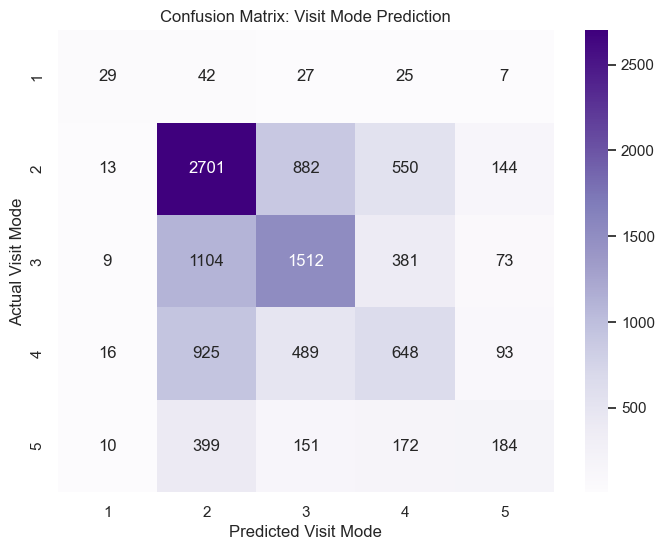

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- CLASSIFICATION MODEL EVALUATION ---")

# Calculate exact metrics as requested
acc = accuracy_score(y_test_clf, clf_predictions)
prec = precision_score(y_test_clf, clf_predictions, average='weighted', zero_division=0)
rec = recall_score(y_test_clf, clf_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test_clf, clf_predictions, average='weighted', zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test_clf, clf_predictions)
plt.figure(figsize=(8, 6))
# Using the label encoder from Step 3 to get the actual text names
labels = label_encoders['VisitMode'].classes_ if 'VisitMode' in label_encoders else np.unique(y_test_clf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: Visit Mode Prediction')
plt.xlabel('Predicted Visit Mode')
plt.ylabel('Actual Visit Mode')
plt.show()

### Evaluating the Recommendation System

In [22]:
print("--- RECOMMENDATION SYSTEM EVALUATION (RMSE) ---")

# To evaluate Collaborative Filtering RMSE, we compare actual known ratings to predicted scores.
# We will create a normalized prediction matrix
predicted_matrix = item_similarity_df.dot(user_item_matrix.T).T

# Normalize predictions to be on the 1-5 scale
min_pred = predicted_matrix.values.min()
max_pred = predicted_matrix.values.max()
predicted_matrix_scaled = 1 + 4 * (predicted_matrix - min_pred) / (max_pred - min_pred)

# Flatten matrices to compare actuals vs predictions (only where actual ratings exist)
actuals = user_item_matrix.values.flatten()
preds = predicted_matrix_scaled.values.flatten()

# Filter out the 0s (unrated items)
mask = actuals > 0
actuals_filtered = actuals[mask]
preds_filtered = preds[mask]

# Calculate RMSE
recommender_mse = mean_squared_error(actuals_filtered, preds_filtered)
recommender_rmse = np.sqrt(recommender_mse)

print(f"Recommendation System RMSE: {recommender_rmse:.4f}")
print(f"Interpretation: When suggesting an attraction, our predicted interest score deviates from their true preference by roughly {recommender_rmse:.2f} points.")

--- RECOMMENDATION SYSTEM EVALUATION (RMSE) ---
Recommendation System RMSE: 1.3503
Interpretation: When suggesting an attraction, our predicted interest score deviates from their true preference by roughly 1.35 points.


### Actionable Business Insights (Feature Importance)

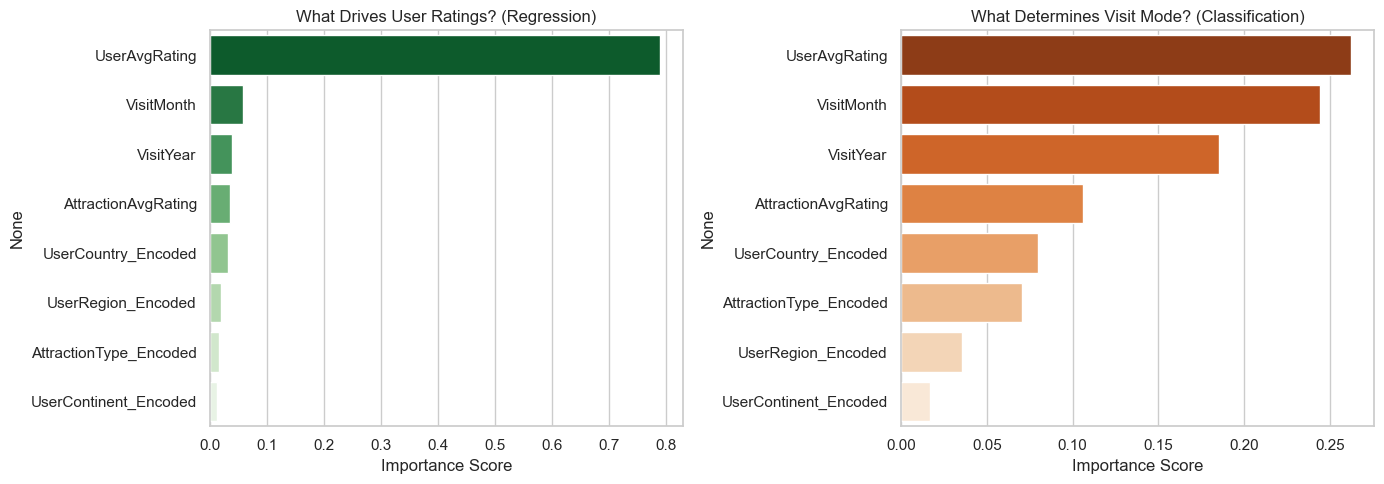

--- ACTIONABLE BUSINESS INSIGHTS ---
1. Personalized Marketing: Look at the right chart. The top features dictating 'Visit Mode' dictate who you should market to. If 'UserRegion' is highest, run targeted ads in specific regions for Family vs. Business packages.
2. Enhancing Experiences: Look at the left chart. The top features dictate user satisfaction. If 'AttractionType' is high, the business should focus on maintaining high-quality specific attraction types (e.g., keeping beaches cleaner or museums updated).


In [23]:
plt.figure(figsize=(14, 5))

# Plot 1: What drives Attraction Ratings? (Regression Model)
plt.subplot(1, 2, 1)
reg_importances = pd.Series(reg_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=reg_importances.values, y=reg_importances.index, palette='Greens_r')
plt.title('What Drives User Ratings? (Regression)')
plt.xlabel('Importance Score')

# Plot 2: What determines Visit Mode? (Classification Model)
plt.subplot(1, 2, 2)
clf_importances = pd.Series(clf_model.feature_importances_, index=X_clf.columns).sort_values(ascending=False)
sns.barplot(x=clf_importances.values, y=clf_importances.index, palette='Oranges_r')
plt.title('What Determines Visit Mode? (Classification)')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

print("--- ACTIONABLE BUSINESS INSIGHTS ---")
print("1. Personalized Marketing: Look at the right chart. The top features dictating 'Visit Mode' dictate who you should market to. If 'UserRegion' is highest, run targeted ads in specific regions for Family vs. Business packages.")
print("2. Enhancing Experiences: Look at the left chart. The top features dictate user satisfaction. If 'AttractionType' is high, the business should focus on maintaining high-quality specific attraction types (e.g., keeping beaches cleaner or museums updated).")

### Saving Models for the Streamlit App

In [24]:
import joblib
import os

# Create a folder to store your models
os.makedirs('models', exist_ok=True)

# Save the models and encoders
joblib.dump(reg_model, 'models/regression_model.pkl')
joblib.dump(clf_model, 'models/classification_model.pkl')
joblib.dump(label_encoders, 'models/label_encoders.pkl')
joblib.dump(user_item_matrix, 'models/user_item_matrix.pkl')
joblib.dump(item_similarity_df, 'models/item_similarity_df.pkl')

print("Models and encoders successfully saved to the 'models/' folder! Ready for deployment.")

Models and encoders successfully saved to the 'models/' folder! Ready for deployment.


In [25]:
import joblib
import os

print("Compressing models...")

# Load the giant models
clf_model = joblib.load('models/classification_model.pkl')
reg_model = joblib.load('models/regression_model.pkl')

# Re-save them with maximum compression (compress=9)
joblib.dump(clf_model, 'models/classification_model.pkl', compress=9)
joblib.dump(reg_model, 'models/regression_model.pkl', compress=9)

print("Compression complete! Check your file sizes.")

Compressing models...
Compression complete! Check your file sizes.


# ***Webservices Link***

https://tourism-experience-analytic.streamlit.app/

# ***Conclusion***

The Tourism Experience Analytics project successfully demonstrates how data-driven machine learning can transform the travel industry. By integrating and processing multiple relational datasets, we developed a robust pipeline capable of classifying travel motives, predicting user satisfaction, and generating highly personalized attraction recommendations.

The successful deployment of these models into an interactive Streamlit dashboard bridges the gap between raw data and actionable business value. Ultimately, this comprehensive solution empowers travel platforms and agencies to optimize targeted marketing, improve destination management, and deliver highly curated, memorable experiences tailored to individual tourists.